<a href="https://colab.research.google.com/github/dinky-coder/dinky-coder/blob/main/SmallScale_chatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gathering Data

In [ ]:
import tensorflow as tf

# Gathering data using TensorFlow's utility function
text_file = tf.keras.utils.get_file(
    fname='fra-eng.zip',
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=True
)

3423204/3423204 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data Preprocessing

In [ ]:
# Importing necessary libraries
import pathlib
import unicodedata
import re
import os # Import os for os.path.join

# Defining the path to the text file
# Using the explicitly defined path from the new extraction cell
text_file = extracted_text_file

def normalize(line):
    # Normalize unicode characters, strip leading/trailing whitespace, convert to lowercase
    line = unicodedata.normalize("NFKC", line.strip().lower())
    # Handle special characters and add start and end tokens for the target language (French)
    line = re.sub(r"^([^ \w])(?!\s)", r"\1", line)
    line = re.sub(r"(\s[^ \w])(?!\s)", r"\1", line)
    line = re.sub(r"(?!\s)([^ \w])$", r"\1", line)
    line = re.sub(r"(?!\s)([^ \w]\s)", r"\1", line)
    try:
        parts = line.split("\t")
        if len(parts) == 2:
            eng, fre = parts
            fre = '[start] ' + fre + ' [end]'
            return eng, fre
        else:
            # Return None or handle lines that don't have two parts as appropriate
            # print(f"Skipping line due to incorrect number of parts after split: {line}") # Keep for debugging if needed
            return None
    except ValueError as e:
        # print(f"ValueError processing line: {line} - Error: {e}") # Keep for debugging if needed
        return None


# Read and normalize the text pairs, filtering out lines that couldn't be normalized
text_pairs = []
with open(text_file, encoding='utf-8') as fp:
    for line in fp:
        normalized_line = normalize(line)
        if normalized_line is not None:
            text_pairs.append(normalized_line)

# Display the first few normalized text pairs to verify
# display(text_pairs[:5]) # Uncomment to display sample data
# print(f"Number of text pairs: {len(text_pairs)}") # Uncomment to print the total number of pairs

In [ ]:
# Explicitly defining the path to the text file based on the extraction location
text_file_path = '/root/.keras/datasets/fra-eng/fra-eng.zip.extracted/fra.txt'

In [ ]:
# Verify the contents of the extracted directory
!ls /root/.keras/datasets/fra-eng/fra-eng.zip.extracted/

ls: cannot access '/root/.keras/datasets/fra-eng/fra-eng.zip.extracted/': No such file or directory


In [ ]:
import zipfile
import os

# Define the path to the downloaded zip file
zip_file_path = '/root/.keras/datasets/fra-eng.zip'

# Define the directory where you want to extract the contents
extracted_path = '/tmp/fra-eng-extracted/'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Define the path to the extracted text file
extracted_text_file = os.path.join(extracted_path, 'fra.txt')

print(f"File extracted to: {extracted_text_file}")

File extracted to: /tmp/fra-eng-extracted/fra.txt


Tokenization and Statistics

In [ ]:
# Tokenization and Statistics

# Initialize sets to store unique tokens for English and French
eng_tokens, fre_tokens = set(), set()
# Initialize variables to store maximum sequence lengths
eng_maxlen, fre_maxlen = 0, 0

# Iterate through text pairs to tokenize and compute statistics
for eng, fre in text_pairs:
    eng_token, fre_token = eng.split(), fre.split()
    eng_maxlen = max(eng_maxlen, len(eng_token))
    fre_maxlen = max(fre_maxlen, len(fre_token))
    eng_tokens.update(eng_token)
    fre_tokens.update(fre_token)

# Print statistics
print(f"Total tokens in English: {len(eng_tokens)}")
print(f"Total tokens in French: {len(fre_tokens)}")
print(f"Maximum length of English sequence: {eng_maxlen}")
print(f"Maximum length of French sequence: {fre_maxlen}")

Total tokens in English: 25365
Total tokens in French: 42027
Maximum length of English sequence: 47
Maximum length of French sequence: 56


Data Serialization

In [ ]:
import pickle

# Serialize preprocessed data for future use
with open("text_pairs.pickle", 'wb') as fp:
    pickle.dump(text_pairs, fp)

In [ ]:
print(text_file)

/tmp/fra-eng-extracted/fra.txt


In [ ]:
with open(text_file) as fp:
  text_pair = [line for line in fp]

In [ ]:
import random
for _ in range(5):
  print(random.choice(text_pair))

By the time he retires, my father will have worked for almost thirty years.	Au moment où il prendra sa retraite, mon père aura travaillé presque trente ans.

I was caught in the rain on my way home.	Je fus surpris par la pluie en rentrant à la maison.

You have made the very same mistake again.	Tu as de nouveau commis exactement la même erreur.

But of course that was a long time ago.	Mais bien sûr, c'était il y a longtemps.

I was looking for a pair of scissors.	Je cherchais une paire de ciseaux.



In [ ]:
# embedding layer
# positional encoding
# attention layer

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import pickle
import random
import pathlib
import unicodedata
import re
import os # Import os for os.path.join
import zipfile # Import zipfile here

# --- Code to download the zip file (copied from Ax6Wb3dIacnx) ---
# Gathering data using TensorFlow's utility function
zip_file_path = tf.keras.utils.get_file(
    fname='fra-eng.zip',
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=False # Set extract to False as we will handle extraction manually
)
# --- End of code to download the zip file ---


# --- Code to define extracted_text_file ---
# Define the directory where you want to extract the contents
extracted_path = '/tmp/fra-eng-extracted/'
# Define the path to the extracted text file
extracted_text_file = os.path.join(extracted_path, 'fra.txt')
# --- End of code to define extracted_text_file ---


# --- Moved extraction code here to ensure it runs after downloading and before opening the text file ---
# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)
# --- End of moved extraction code ---


# --- Code to create text_pairs (copied from zv-ui08naz6j) ---
# Defining the path to the text file
# Using the explicitly defined path after extraction
text_file = extracted_text_file

def normalize(line):
    # Normalize unicode characters, strip leading/trailing whitespace, convert to lowercase
    line = unicodedata.normalize("NFKC", line.strip().lower())
    # Handle special characters and add start and end tokens for the target language (French)
    line = re.sub(r"^([^ \w])(?!\s)", r"\1", line)
    line = re.sub(r"(\s[^ \w])(?!\s)", r"\1", line)
    line = re.sub(r"(?!\s)([^ \w])$", r"\1", line)
    line = re.sub(r"(?!\s)([^ \w]\s)", r"\1", line)
    try:
        parts = line.split("\t")
        if len(parts) == 2:
            eng, fre = parts
            fre = '[start] ' + fre + ' [end]'
            return eng, fre
        else:
            # Return None or handle lines that don't have two parts as appropriate
            # print(f"Skipping line due to incorrect number of parts after split: {line}") # Keep for debugging if needed
            return None
    except ValueError as e:
        # print(f"ValueError processing line: {line} - Error: {e}") # Keep for debugging if needed
        return None

# Read and normalize the text pairs, filtering out lines that couldn't be normalized
text_pairs = []
with open(text_file, encoding='utf-8') as fp:
    for line in fp:
        normalized_line = normalize(line)
        if normalized_line is not None:
            text_pairs.append(normalized_line)
# --- End of code to create text_pairs ---


# Shuffle the data
random.shuffle(text_pairs)

# Split into train and test sets
n_val = int(0.15 * len(text_pairs))
n_train = len(text_pairs) - 2 * n_val
train_pair = text_pairs[:n_train]
test_pair = text_pairs[n_train: n_train + n_val]

# Vocabulary sizes and sequence length
vocab_en = 10000
vocab_fr = 20000
seq_length = 25

# Initialize TextVectorization layers
eng_vect = TextVectorization(
    max_tokens=vocab_en,
    standardize=None,
    split='whitespace',
    output_mode='int',
    output_sequence_length=seq_length
)

fre_vect = TextVectorization(
    max_tokens=vocab_fr,
    standardize=None,
    split='whitespace',
    output_mode='int',
    output_sequence_length=seq_length + 1  # +1 for start token
)

# Adapt TextVectorization layers to training data
train_eng = [pair[0] for pair in train_pair]
train_fre = [pair[1] for pair in train_pair]

eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

# Serialize the vectorization layers and training/test data
# Removed file loading as text_pairs should be available from previous cell execution
# with open('vectorize.pickle', 'wb') as fp:
#     data = {'train': train_pair,
#             'test': test_pair,
#             'eng_vect': eng_vect.get_config(),
#             'fre_vect': fre_vect.get_config(),
#             'eng_weights': eng_vect.get_weights(),
#             'fre_weights': fre_vect.get_weights()
#             }
#     pickle.dump(data, fp)

# Load serialized data
# Removed file loading as text_pairs should be available from previous cell execution
# with open("vectorize.pickle", 'rb') as fp:
#     data = pickle.load(data) # Corrected variable name from data to data

# Reconstruct TextVectorization layers
# Removed file loading as text_pairs should be available from previous cell execution
# eng_vect = TextVectorization.from_config(data['eng_vect'])
# eng_vect.set_weights(data['eng_weights'])
# fre_vect = TextVectorization.from_config(data['fre_vect'])
# fre_vect.set_weights(data['fre_weights'])


# Define function to format dataset
def format_dataset(eng, fre):
    eng = eng_vect(eng)
    fre = fre_vect(fre)
    source = {'encode_inp': eng,
              'decode_inp': fre[:, :-1]
              }
    target = fre[:, 1:]
    return (source, target)

# Define function to create dataset
def make_dataset(pairs, batchsize=64):
    eng_text, fre_text = zip(*pairs)
    dataset = tf.data.Dataset.from_tensor_slices((list(eng_text), list(fre_text)))
    return dataset.shuffle(2048).batch(batchsize).map(format_dataset).prefetch(16).cache()

# Create TensorFlow datasets for training and testing
train_ds = make_dataset(train_pair)
test_ds = make_dataset(test_pair)

3423204/3423204 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Positional Embedding

In [ ]:
import numpy as np

# Function to generate positional encoding matrix
def pos_enc_matrix(L, d, n=10000):
    assert d % 2 == 0
    d2 = d // 2

    P = np.zeros((L, d))
    k = np.arange(L).reshape(-1, 1)
    i = np.arange(d2).reshape(1, -1)

    denom = np.power(n, -i / d2)
    args = k * denom

    P[:, ::2] = np.sin(args)
    P[:, 1::2] = np.cos(args)
    return P

# Custom Keras layer for positional embedding
class PositionalEmbedding(tf.keras.layers.Layer):

    def __init__(self, seq_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.seq_length = seq_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

        self.token_embeddings = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        matrix = pos_enc_matrix(seq_length, embed_dim)

        self.positional_embedding = tf.constant(matrix, dtype='float32')

    def call(self, inputs):
        embedded_tokens = self.token_embeddings(inputs)
        return embedded_tokens + self.positional_embedding

    def compute_mask(self, *args, **kwargs):
        return self.token_embeddings.compute_mask(*args, **kwargs)

    def get_config(self):
        config = super().get_config()
        config.update({
            'seq_length': self.seq_length,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })

# Usage and Validation
vocab_en = 10000
seq_length = 25

for inputs, targets in train_ds.take(1):
    print(inputs['encode_inp'])
    embed_en = PositionalEmbedding(seq_length, vocab_en, embed_dim=512)
    en_emb = embed_en(inputs['encode_inp'])
    print(en_emb._keras_mask)

tf.Tensor(
[[  94  152  442 ...    0    0    0]
 [  46 3082   45 ...    0    0    0]
 [   7   17   20 ...    0    0    0]
 ...
 [   2 1268  109 ...    0    0    0]
 [ 127   38   19 ...    0    0    0]
 [  25   55 2388 ...    0    0    0]], shape=(64, 25), dtype=int64)
tf.Tensor(
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]], shape=(64, 25), dtype=bool)


# Neural Networks
Self-Attention Layer

In [ ]:
import tensorflow as tf

def self_attention(input_shape, prefix='att', mask=False, **kwargs):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prefix}_in1")

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_att1", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm1')
    add = tf.keras.layers.Add(name=f'{prefix}_add1')

    # Apply attention mechanism
    attout = attention(query=inputs, value=inputs, key=inputs, use_causal_mask=mask)

    # Apply normalization and residual connection
    output = norm(add([inputs, attout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f"{prefix}_att")

    return model

In [ ]:
seq_length = 25
key_dim = 128
num_heads = 8

model = self_attention(input_shape = (seq_length, key_dim), num_heads = num_heads, key_dim = key_dim)

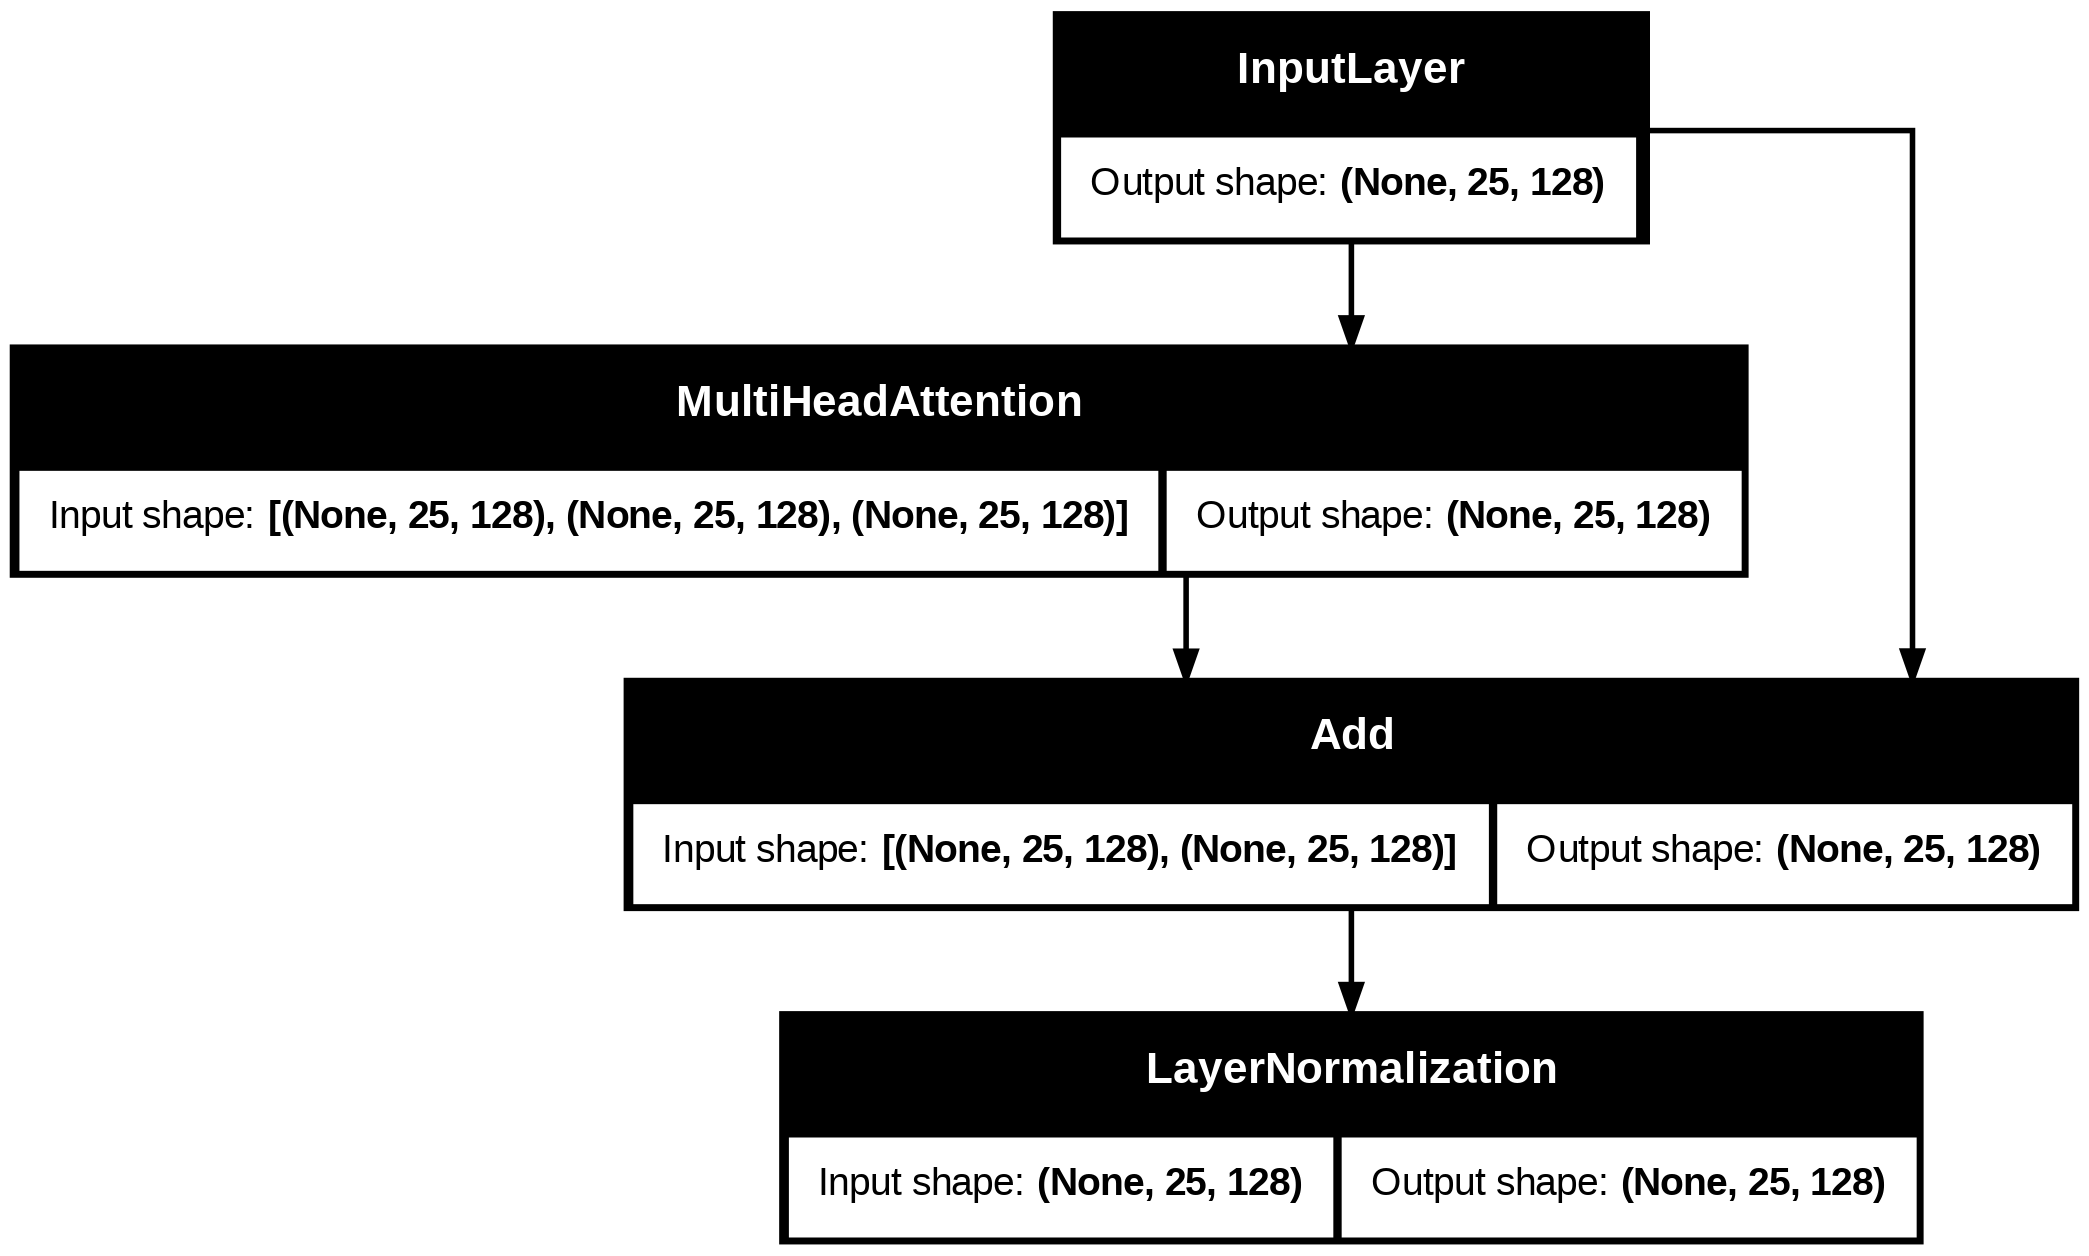

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Cross-Attention Layer

In [ ]:
def cross_attention(input_shape, context_shape, prefix='att', **kwargs):
    # Define inputs
    context = tf.keras.layers.Input(shape=context_shape, dtype='float32', name=f"{prefix}_ctx2")
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in2')

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f'{prefix}_att2', **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm2')
    add = tf.keras.layers.Add(name=f'{prefix}_add2')

    # Apply attention mechanism
    attout = attention(query=inputs, key=context, value=context)

    # Apply normalization and residual connection
    output = norm(add([attout, inputs]))

    # Create the model
    model = tf.keras.Model(inputs=[context, inputs], outputs=output, name=f'{prefix}_crs_at')

    return model

In [ ]:
model = cross_attention(input_shape = (seq_length, key_dim), num_heads = num_heads, key_dim = key_dim, context_shape = (seq_length, key_dim))

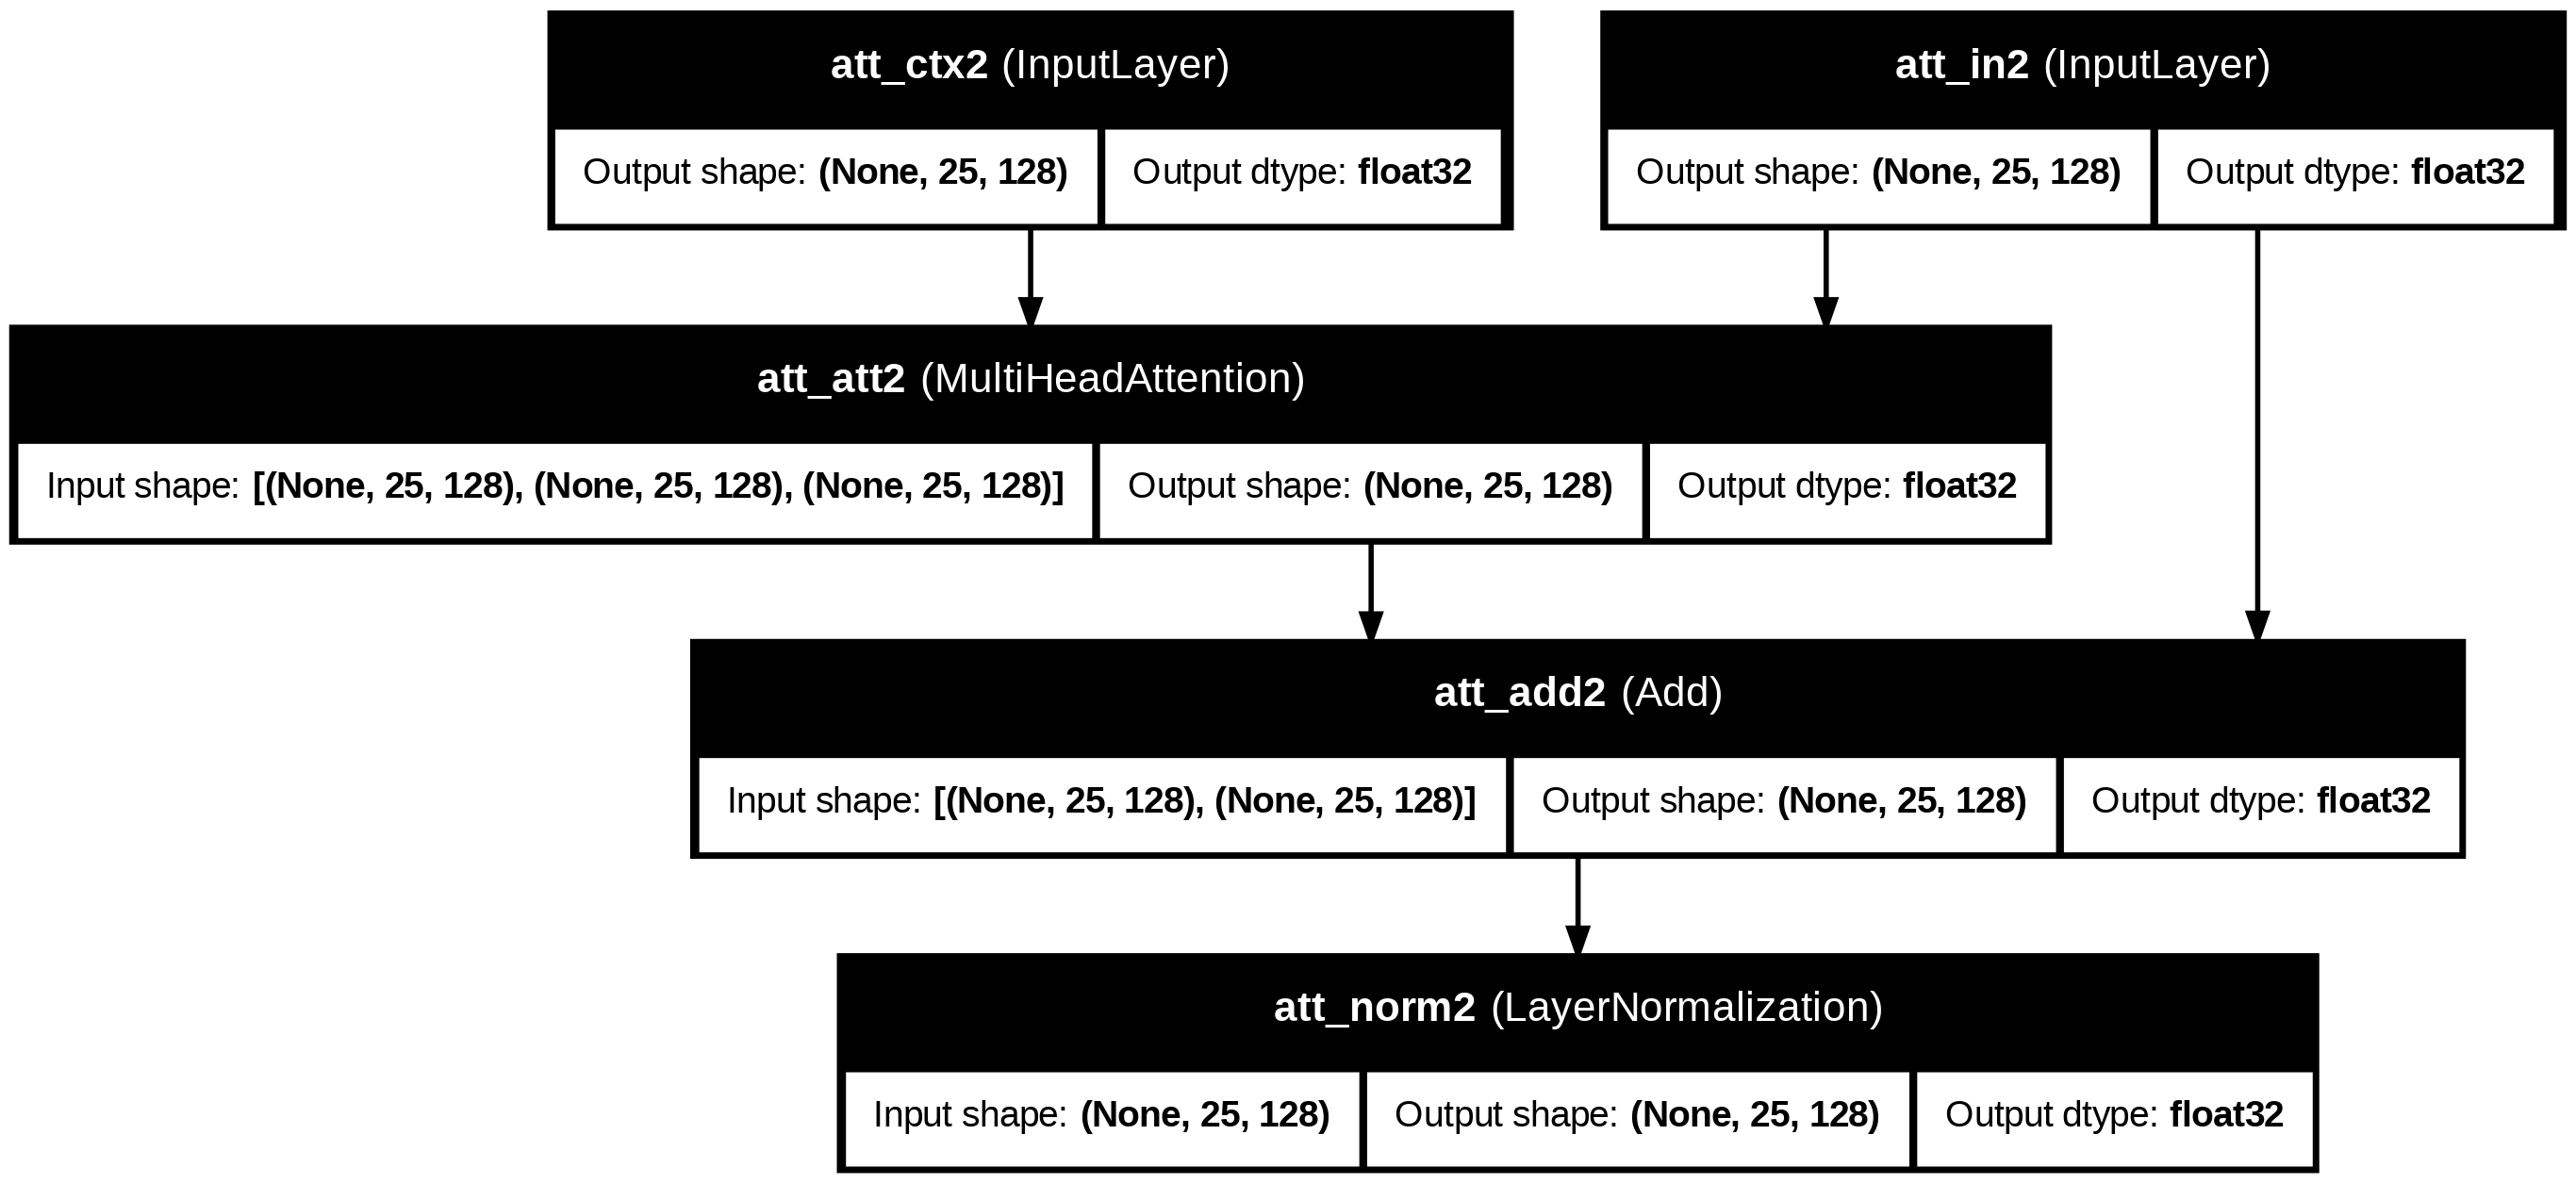

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

Feed-Forward Layer

In [ ]:
def feed_forward(input_shape, model_dim, ff_dim, dropout=.1, prefix='ff'):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in3')

    # Dense layers
    dense1 = tf.keras.layers.Dense(ff_dim, name=f'{prefix}_ff1', activation='relu')
    dense2 = tf.keras.layers.Dense(model_dim, name=f'{prefix}_ff2')
    drop = tf.keras.layers.Dropout(dropout, name=f'{prefix}_drop')
    add = tf.keras.layers.Add(name=f"{prefix}_add3")

    # Apply feed-forward transformation
    ffout = drop(dense2(dense1(inputs)))

    # Layer normalization and residual connection
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm3')
    output = norm(add([inputs, ffout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f'{prefix}_ff')

    return model

In [ ]:
ff_dim = 512

model = feed_forward(input_shape = (seq_length, key_dim), model_dim = key_dim, ff_dim = ff_dim)

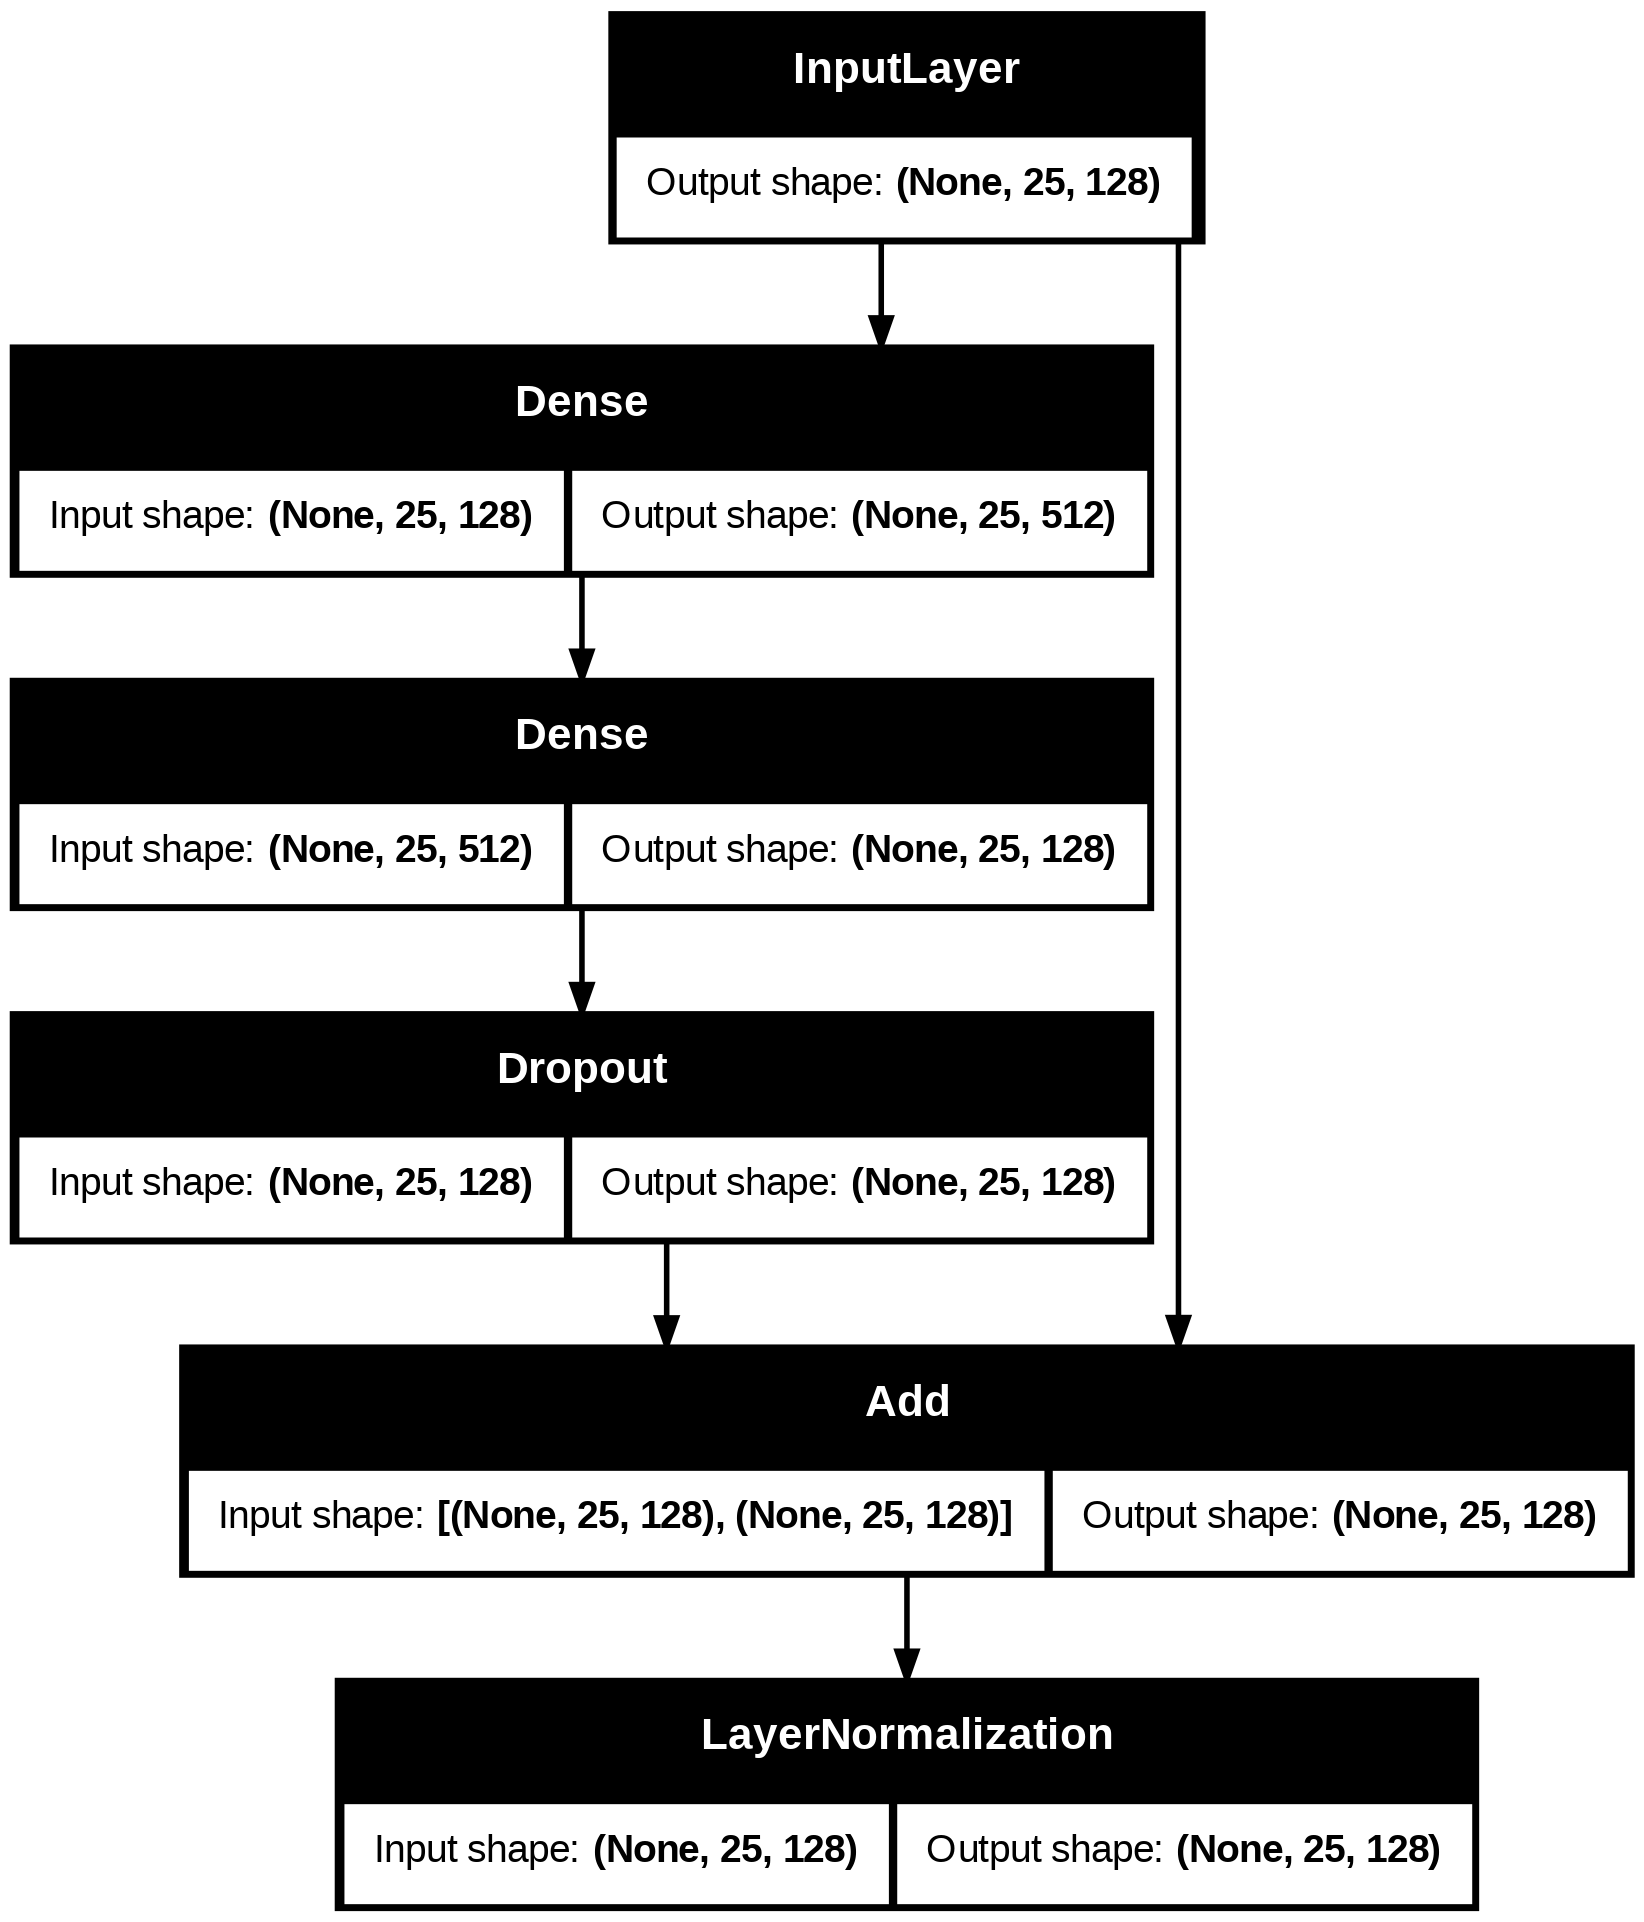

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Encoder Layer

In [16]:
import tensorflow as tf

def encoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='enc', **kwargs):
    # Define a Sequential model for the encoder
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in0'), # Input layer
        self_attention(input_shape, prefix=prefix, key_dim=key_dim, mask=False, **kwargs), # Self-attention layer
        feed_forward(input_shape, key_dim, ff_dim, dropout, prefix) # Feed-forward layer
    ])

    return model

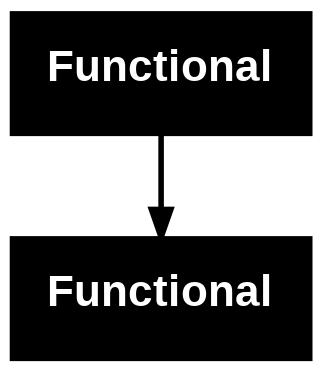

In [17]:
seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

# Pass the defined functions to the encoder function
model = encoder(
    input_shape = (seq_length, key_dim),
    key_dim = key_dim,
    ff_dim = ff_dim,
    num_heads = num_heads)

tf.keras.utils.plot_model(model)

Decoder Layer

In [23]:
import tensorflow as tf

# Define the self_attention function
def self_attention(input_shape, prefix='att', mask=False, **kwargs):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prefix}_in1")

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_att1", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm1')
    add = tf.keras.layers.Add(name=f'{prefix}_add1')

    # Apply attention mechanism
    attout = attention(query=inputs, value=inputs, key=inputs, use_causal_mask=mask)

    # Apply normalization and residual connection
    output = norm(add([inputs, attout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f"{prefix}_att")

    return model

# Define the cross_attention function
def cross_attention(input_shape, context_shape, prefix='att', **kwargs):
    # Define inputs
    context = tf.keras.layers.Input(shape=context_shape, dtype='float32', name=f"{prefix}_ctx2")
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in2')

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f'{prefix}_att2', **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm2')
    add = tf.keras.layers.Add(name=f'{prefix}_add2')

    # Apply attention mechanism
    attout = attention(query=inputs, key=context, value=context)

    # Apply normalization and residual connection
    output = norm(add([attout, inputs]))

    # Create the model
    model = tf.keras.Model(inputs=[context, inputs], outputs=output, name=f'{prefix}_crs_at')

    return model

# Define the feed_forward function
def feed_forward(input_shape, model_dim, ff_dim, dropout=.1, prefix='ff'):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in3')

    # Dense layers
    dense1 = tf.keras.layers.Dense(ff_dim, name=f'{prefix}_ff1', activation='relu')
    dense2 = tf.keras.layers.Dense(model_dim, name=f'{prefix}_ff2')
    drop = tf.keras.layers.Dropout(dropout, name=f'{prefix}_drop')
    add = tf.keras.layers.Add(name=f"{prefix}_add3")

    # Apply feed-forward transformation
    ffout = drop(dense2(dense1(inputs)))

    # Layer normalization and residual connection
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm3')
    output = norm(add([inputs, ffout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f'{prefix}_ff')

    return model


# Define the decoder function
def decoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='dec', **kwargs):
    # Define inputs for decoder
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in0')
    context = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_ctx0')

    # Self-attention and cross-attention layers
    att_model = self_attention(input_shape, key_dim=key_dim, mask=True, prefix=prefix, **kwargs)
    cross_model = cross_attention(input_shape, input_shape, key_dim=key_dim, prefix=prefix, **kwargs)

    # Feed-forward layer
    ff_model = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix)

    # Connect layers
    x = att_model(inputs)
    x = cross_model([context, x])
    output = ff_model(x)

    # Define decoder model
    model = tf.keras.Model(inputs=[inputs, context], outputs=output, name=prefix)

    return model

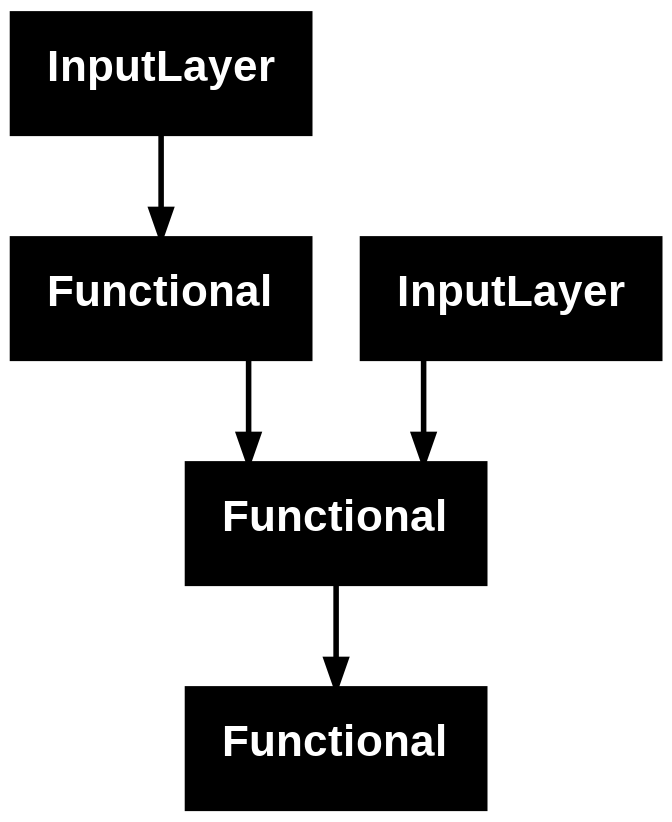

In [22]:
seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

# Pass the defined functions to the encoder function
model = decoder(
    input_shape = (seq_length, key_dim),
    key_dim = key_dim,
    ff_dim = ff_dim,
    num_heads = num_heads)

tf.keras.utils.plot_model(model)

Transformer Model

In [1]:
def transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout=0.1, name='transformer'):
    # Define encoder and decoder inputs
    input_enc = tf.keras.layers.Input(shape=(seq_length), dtype='int32', name='encode_inp')
    input_dec = tf.keras.layers.Input(shape=(seq_length), dtype='int32', name='decode_inp')

    # Positional embeddings for encoder and decoder inputs
    emb_enc = PositionalEmbedding(seq_length, vocab_size_en, key_dim, name='embed_enc')
    emb_dec = PositionalEmbedding(seq_length, vocab_size_fr, key_dim, name='embed_dec')

    # Create encoder and decoder layers
    encoders = [encoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"enc{i}", num_heads=num_heads)
                for i in range(num_layers)]
    decoders = [decoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"dec{i}", num_heads=num_heads)
                for i in range(num_layers)]

    # Final dense layer
    final = tf.keras.layers.Dense(vocab_size_fr, name='linear')

    # Apply encoder and decoder layers to inputs
    x1 = emb_enc(input_enc)
    x2 = emb_dec(input_dec)
    for layer in encoders:
        x1 = layer(x1)
    for layer in decoders:
        x2 = layer([x2, x1])

    # Generate output
    output = final(x2)

    try:
        del output.keras_mask
    except:
        pass

    # Define transformer model
    model = tf.keras.Model(inputs=[input_enc, input_dec], outputs=output, name=name)

    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'sequential_4' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'dec0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


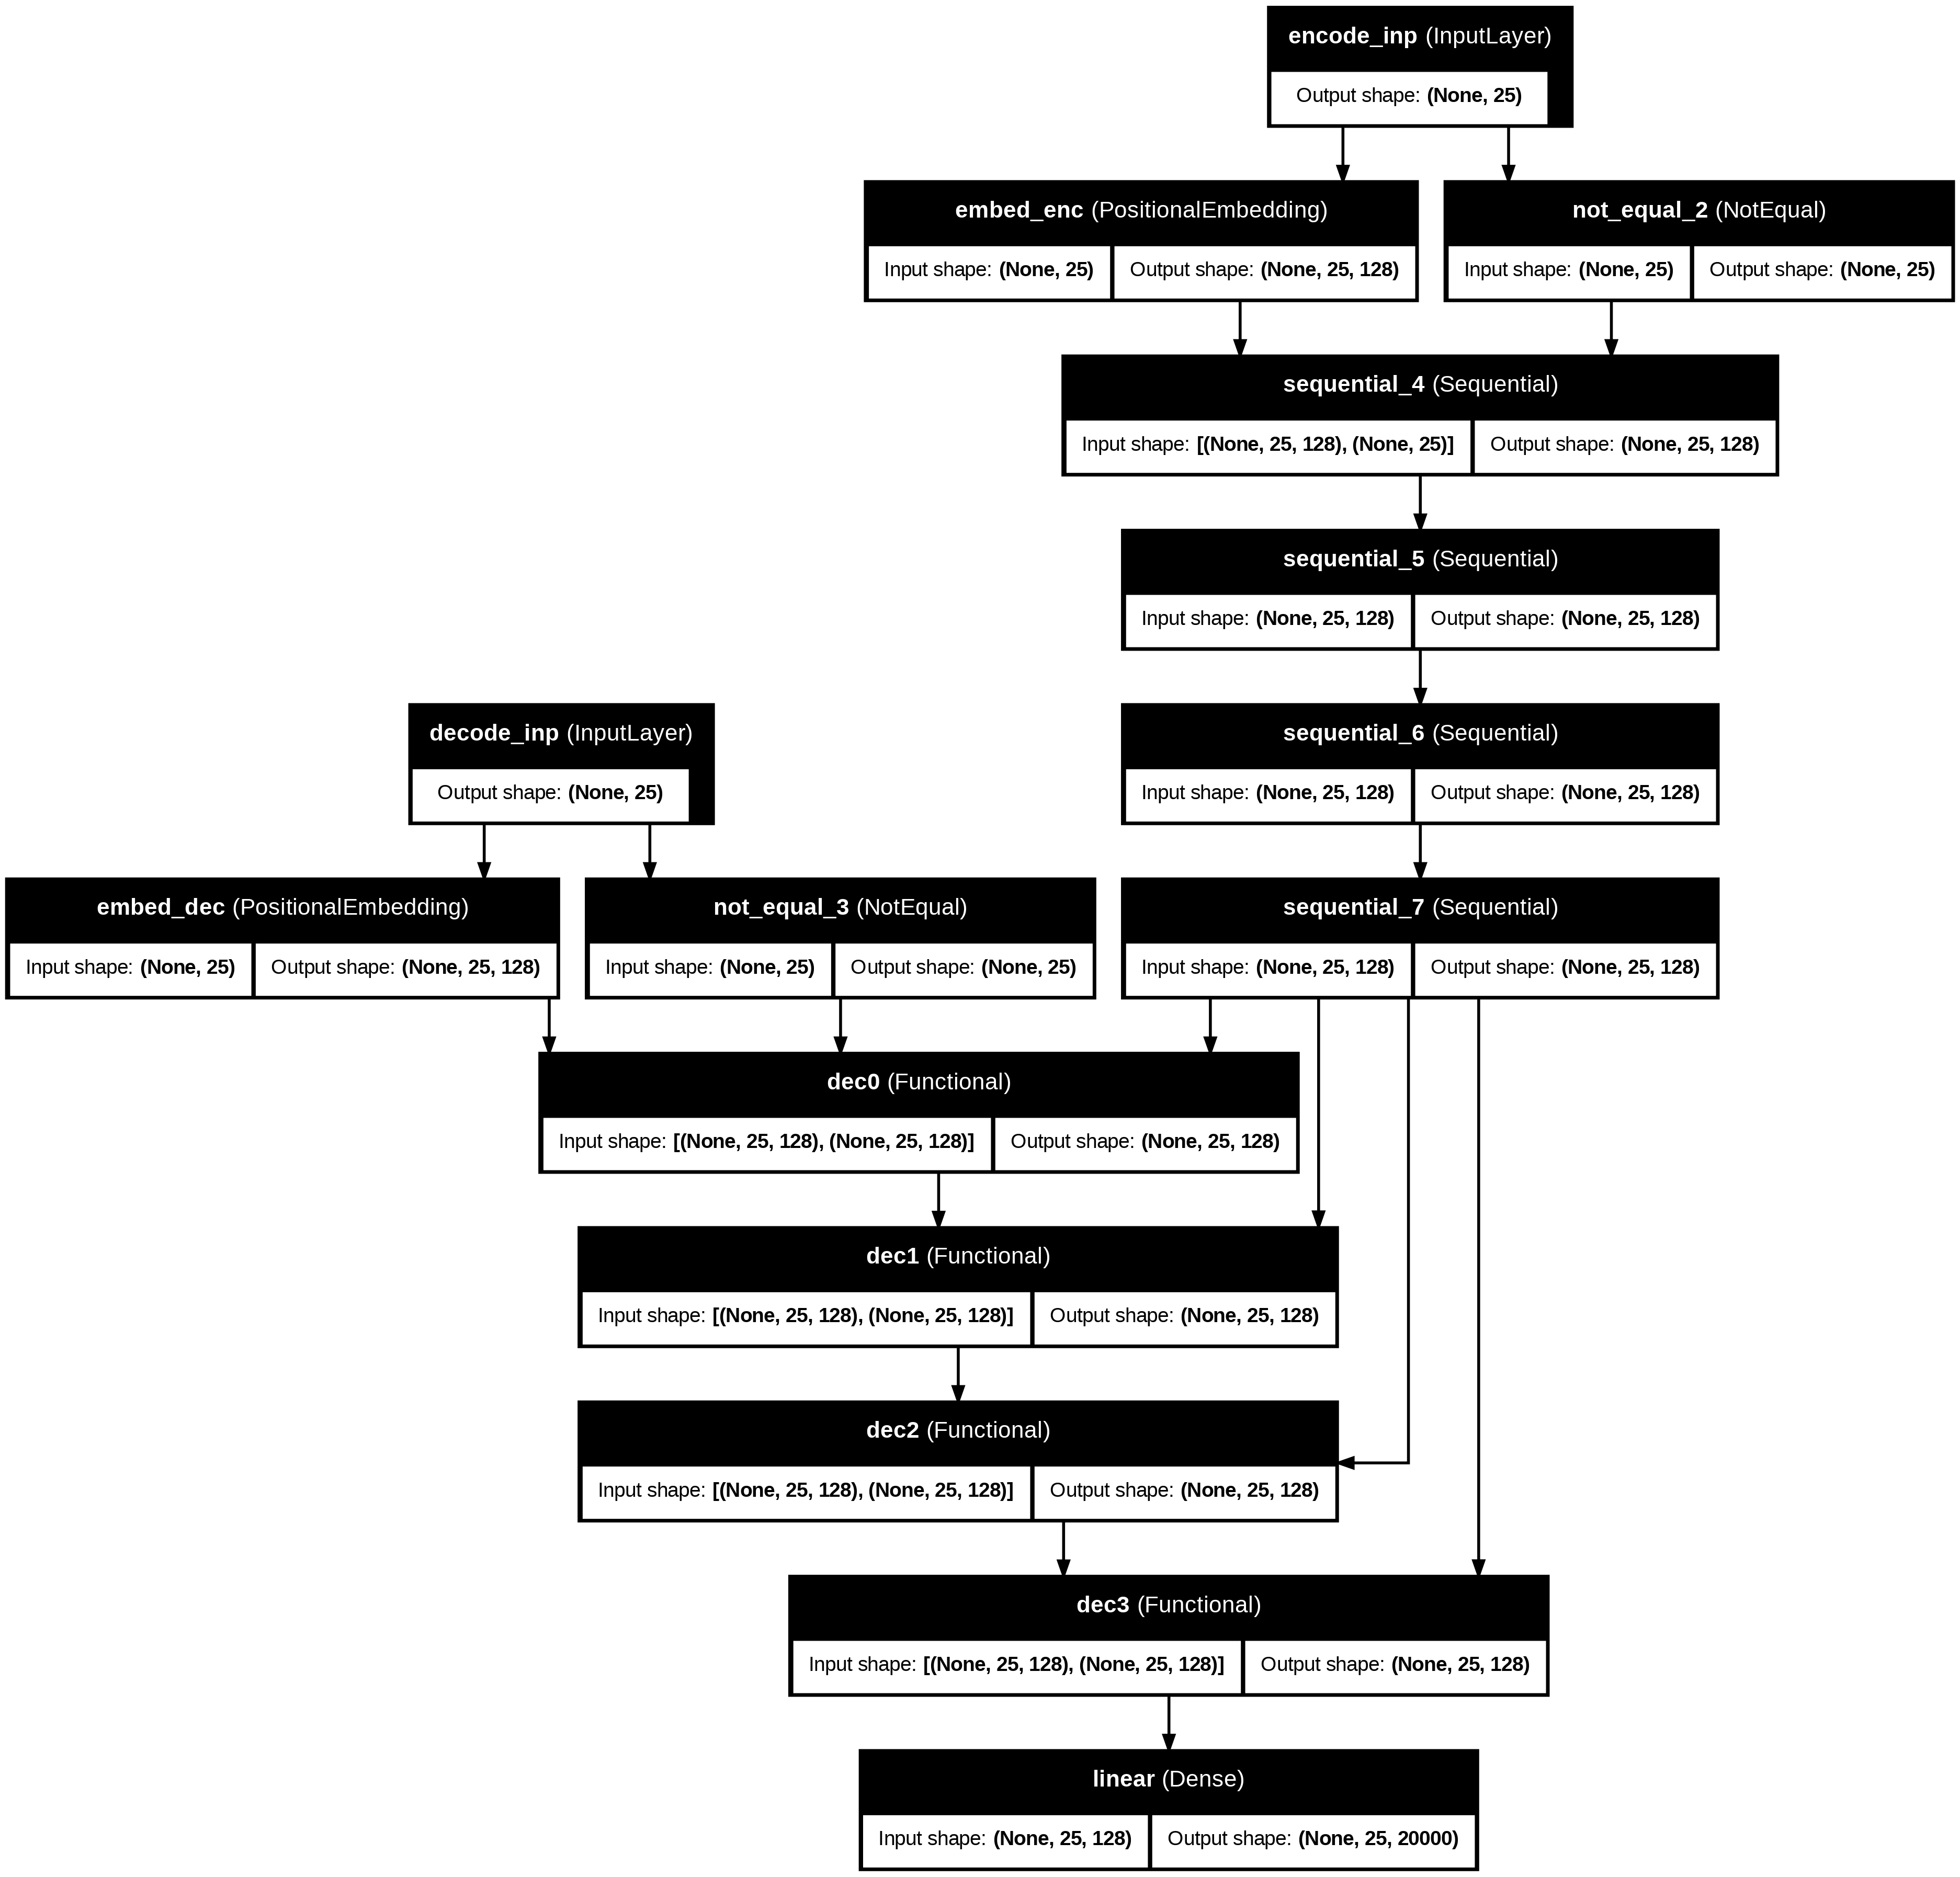

In [6]:
import tensorflow as tf
import numpy as np

# Function to generate positional encoding matrix
def pos_enc_matrix(L, d, n=10000):
    assert d % 2 == 0
    d2 = d // 2

    P = np.zeros((L, d))
    k = np.arange(L).reshape(-1, 1)
    i = np.arange(d2).reshape(1, -1)

    denom = np.power(n, -i / d2)
    args = k * denom

    P[:, ::2] = np.sin(args)
    P[:, 1::2] = np.cos(args)
    return P

# Define the PositionalEmbedding layer
class PositionalEmbedding(tf.keras.layers.Layer):

    def __init__(self, seq_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.seq_length = seq_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

        self.token_embeddings = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        matrix = pos_enc_matrix(seq_length, embed_dim)

        self.positional_embedding = tf.constant(matrix, dtype='float32')

    def call(self, inputs):
        embedded_tokens = self.token_embeddings(inputs)
        return embedded_tokens + self.positional_embedding

    def compute_mask(self, *args, **kwargs):
        return self.token_embeddings.compute_mask(*args, **kwargs)

    def get_config(self):
        config = super().get_config()
        config.update({
            'seq_length': self.seq_length,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })

# Define the self_attention function
def self_attention(input_shape, prefix='att', mask=False, **kwargs):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prefix}_in1")

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_att1", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm1')
    add = tf.keras.layers.Add(name=f'{prefix}_add1')

    # Apply attention mechanism
    attout = attention(query=inputs, value=inputs, key=inputs, use_causal_mask=mask)

    # Apply normalization and residual connection
    output = norm(add([inputs, attout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f"{prefix}_att")

    return model

# Define the cross_attention function
def cross_attention(input_shape, context_shape, prefix='att', **kwargs):
    # Define inputs
    context = tf.keras.layers.Input(shape=context_shape, dtype='float32', name=f"{prefix}_ctx2")
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in2')

    # Multi-head attention layer
    attention = tf.keras.layers.MultiHeadAttention(name=f'{prefix}_att2', **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm2')
    add = tf.keras.layers.Add(name=f'{prefix}_add2')

    # Apply attention mechanism
    attout = attention(query=inputs, key=context, value=context)

    # Apply normalization and residual connection
    output = norm(add([attout, inputs]))

    # Create the model
    model = tf.keras.Model(inputs=[context, inputs], outputs=output, name=f'{prefix}_crs_at')

    return model

# Define the feed_forward function
def feed_forward(input_shape, model_dim, ff_dim, dropout=.1, prefix='ff'):
    # Define inputs
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in3')

    # Dense layers
    dense1 = tf.keras.layers.Dense(ff_dim, name=f'{prefix}_ff1', activation='relu')
    dense2 = tf.keras.layers.Dense(model_dim, name=f'{prefix}_ff2')
    drop = tf.keras.layers.Dropout(dropout, name=f'{prefix}_drop')
    add = tf.keras.layers.Add(name=f"{prefix}_add3")

    # Apply feed-forward transformation
    ffout = drop(dense2(dense1(inputs)))

    # Layer normalization and residual connection
    norm = tf.keras.layers.LayerNormalization(name=f'{prefix}_norm3')
    output = norm(add([inputs, ffout]))

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name=f'{prefix}_ff')

    return model

# Define the encoder function
def encoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='enc', **kwargs):
    # Define a Sequential model for the encoder
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in0'), # Input layer
        self_attention(input_shape, prefix=prefix, key_dim=key_dim, mask=False, **kwargs), # Self-attention layer
        feed_forward(input_shape, key_dim, ff_dim, dropout, prefix) # Feed-forward layer
    ])

    return model

# Define the decoder function
def decoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='dec', **kwargs):
    # Define inputs for decoder
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_in0')
    context = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f'{prefix}_ctx0')

    # Self-attention and cross-attention layers
    att_model = self_attention(input_shape, key_dim=key_dim, mask=True, prefix=prefix, **kwargs)
    cross_model = cross_attention(input_shape, input_shape, key_dim=key_dim, prefix=prefix, **kwargs)

    # Feed-forward layer
    ff_model = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix)

    # Connect layers
    x = att_model(inputs)
    x = cross_model([context, x])
    output = ff_model(x)

    # Define decoder model
    model = tf.keras.Model(inputs=[inputs, context], outputs=output, name=prefix)

    return model

# Define the transformer model
def transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout=0.1, name='transformer'):
    # Define encoder and decoder inputs
    input_enc = tf.keras.layers.Input(shape=(seq_length,), dtype='int32', name='encode_inp') # Corrected shape
    input_dec = tf.keras.layers.Input(shape=(seq_length,), dtype='int32', name='decode_inp') # Corrected shape

    # Positional embeddings for encoder and decoder inputs
    emb_enc = PositionalEmbedding(seq_length, vocab_size_en, key_dim, name='embed_enc')
    emb_dec = PositionalEmbedding(seq_length, vocab_size_fr, key_dim, name='embed_dec')

    # Create encoder and decoder layers
    encoders = [encoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"enc{i}", num_heads=num_heads)
                for i in range(num_layers)]
    decoders = [decoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"dec{i}", num_heads=num_heads)
                for i in range(num_layers)]

    # Final dense layer
    final = tf.keras.layers.Dense(vocab_size_fr, name='linear')

    # Apply encoder and decoder layers to inputs
    x1 = emb_enc(input_enc)
    x2 = emb_dec(input_dec)
    for layer in encoders:
        x1 = layer(x1)
    for layer in decoders:
        x2 = layer([x2, x1])

    # Generate output
    output = final(x2)

    try:
        del output.keras_mask
    except:
        pass

    # Define transformer model
    model = tf.keras.Model(inputs=[input_enc, input_dec], outputs=output, name=name)

    return model


seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8
num_layers = 4
dropout = 0.1
vocab_en = 10000
vocab_fr = 20000

model = transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_en, vocab_fr, dropout)

tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names = True)

Compile Model

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encode_inp          │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_enc           │ (None, 25, 128)   │  1,280,000 │ encode_inp[0][0]  │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 25)        │          0 │ encode_inp[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 25, 128)   │    659,712 │ embed_enc[0][0],  │
│ (Sequential)        │                   │            │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 25, 128)   │    659,712 │ sequential_4[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decode_inp          │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 25, 128)   │    659,712 │ sequential_5[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_dec           │ (None, 25, 128)   │  2,560,000 │ decode_inp[0][0]  │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 25, 128)   │    659,712 │ sequential_6[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, 25)        │          0 │ decode_inp[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,456 │ embed_dec[0][0],  │
│                     │                   │            │ sequential_7[0][… │
│                     │                   │            │ not_equal_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,456 │ dec0[0][0],       │
│                     │                   │            │ sequential_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,456 │ dec1[0][0],       │
│                     │                   │            │ sequential_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,456 │ dec2[0][0],       │
│                     │                   │            │ sequential_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 20000) │  2,580,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,808,672 (52.68 MB)

 Trainable params: 13,808,672 (52.68 MB)

 Non-trainable params: 0 (0.00 B)